This notebook summarises a simple workflow to compare the performance of different ML estimators for the dataset described [here](https://tessarinseve.pythonanywhere.com/nws/2022-02-10.wiki.html). 

In [34]:
## igmore warnings
import warnings
warnings.filterwarnings('ignore')

In [35]:
## relevant modules
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from pathlib import Path


In [36]:
csvdir="C://Users/Seve//workplace/vimfastml/data/"
training_features = pd.read_csv(Path(csvdir, "features_training.csv"), header = None)
training_labels = pd.read_csv(Path(csvdir, "labels_training.csv"), header = None)
test_features = pd.read_csv(Path(csvdir, "features_test.csv"), header = None)
test_labels = pd.read_csv(Path(csvdir, "labels_test.csv"), header = None)

In [37]:
training_features.head(5)


0         1
0  1.147382  0.026487
1  0.100893  0.882746
2 -0.041287  0.400452
3  0.657740 -0.385432
4 -0.053942  0.268567

The code below will display[YellowBrick](https://www.scikit-yb.org/en/latest/api/classifier/classification_report.html) classification report for several estimators.

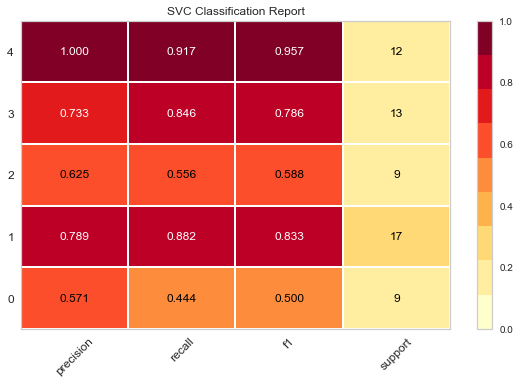

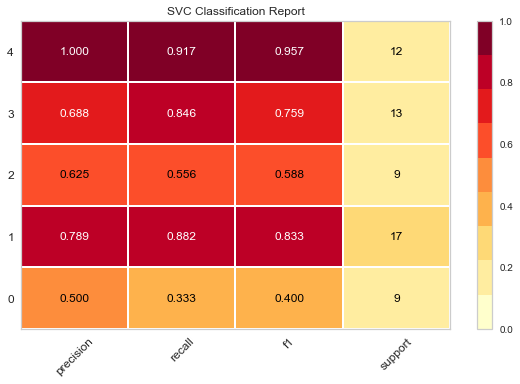

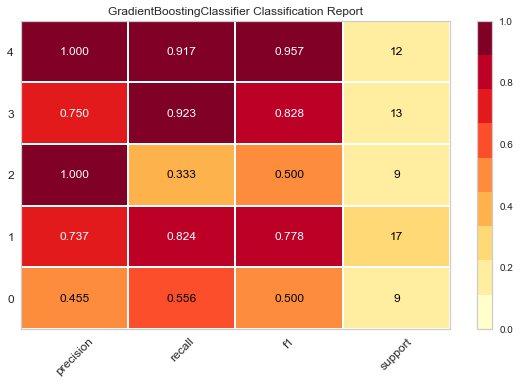

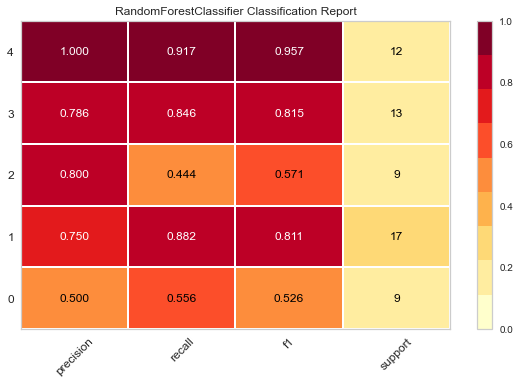

In [38]:

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report

models = [
    SVC(gamma='auto'), # Support Vector Classification.
    SVC(kernel='linear',class_weight="balanced", C=1.0, random_state=0), # Support Vector Classification. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
    KNeighborsClassifier(),
    BaggingClassifier(),
    GradientBoostingClassifier(random_state=0),
    RandomForestClassifier(n_estimators=300)
]

def print_classification_report(X, y, X_test, y_test, estimator):
    """
    print scikit-learn classification report
    """

    # Instantiate the estimator
    model.fit(X, y)

    expected  = y_test
    predicted = model.predict(X_test)
     
    print("{}:\n{}".format(estimator.__class__.__name__, 
                          classification_report(expected, predicted)))

    
def display_classification_report(X, y, X_test, y_test, estimator):
    """
    yb classification report 
    """
    visualizer = ClassificationReport(estimator,support=True)

    visualizer.fit(X, y)  
    visualizer.score(X_test, y_test)  
    visualizer.show()
    
#print_classification_report(training_features, training_labels.values.flatten(),test_features,test_labels.values.flatten(),BaggingClassifier())

for model in models:
    display_classification_report(training_features, training_labels.values.flatten(),test_features,test_labels.values.flatten(),model)

